In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from transformers import BertTokenizerFast
from datasets import Dataset


In [38]:
wiki_data = pd.read_json("/data/ephemeral/home/sangyeop/code/data/wikipedia_documents.json")
wiki_data = wiki_data.transpose()

In [39]:
train_path = "/data/ephemeral/home/sangyeop/code/data/train_dataset/train/dataset.arrow"
validation_path = "/data/ephemeral/home/sangyeop/code/data/train_dataset/validation/dataset.arrow"

# 데이터 로드
train_dataset = Dataset.from_file(train_path)
validation_dataset = Dataset.from_file(validation_path)
train_data = pd.DataFrame(train_dataset)
validation_data = pd.DataFrame(validation_dataset)


# Wiki data EDA

In [84]:
len(wiki_data['document_id'].unique())

60613

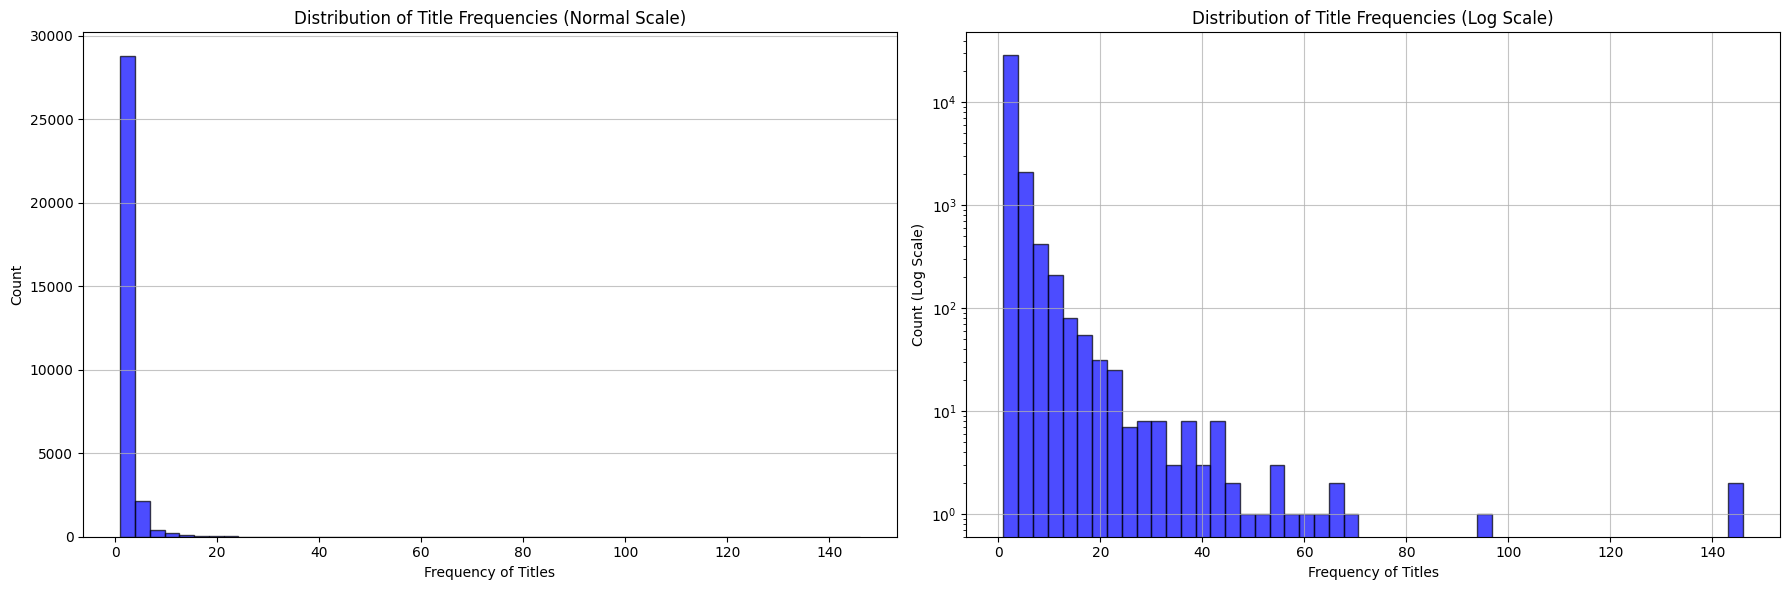

In [41]:
# 타이틀 길이 분포
unique_titles = wiki_data['title'].value_counts().reset_index()
unique_titles.columns = ['Title', 'Frequency']
frequency_distribution = unique_titles[unique_titles['Frequency'] > 0]

# 두 개의 그래프를 나란히 그리기 위해 subplot 생성
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# 일반 스케일 히스토그램
axes[0].hist(frequency_distribution['Frequency'], bins=50, color='blue', edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Title Frequencies (Normal Scale)')
axes[0].set_xlabel('Frequency of Titles')
axes[0].set_ylabel('Count')
axes[0].grid(axis='y', alpha=0.75)

# 로그 스케일 히스토그램
axes[1].hist(frequency_distribution['Frequency'], bins=50, color='blue', edgecolor='black', alpha=0.7)
axes[1].set_yscale('log')  # y축에 로그 스케일 적용
# axes[1].set_xscale('log')  # x축에 로그 스케일 적용
axes[1].set_title('Distribution of Title Frequencies (Log Scale)')
axes[1].set_xlabel('Frequency of Titles')
axes[1].set_ylabel('Count (Log Scale)')
axes[1].grid(axis='both', alpha=0.75)

# 그래프 출력
plt.tight_layout()
plt.show()

- 한 데이터가 반복적으로 나오는 경우는 드뭄

- 중복되는 title을 가진 데이터가 있긴 있지만 대부분이 별개의 title을 가짐

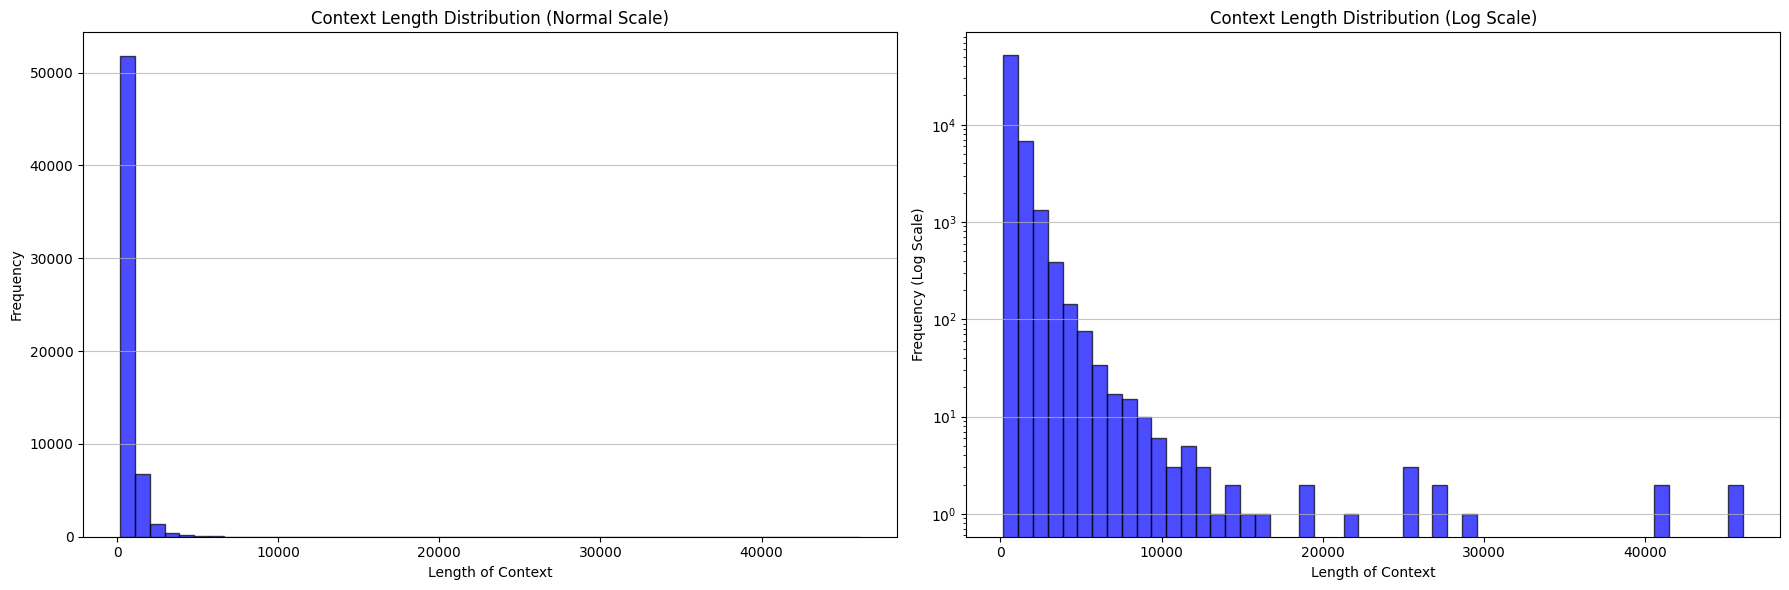

In [42]:
wiki_data['context_length'] = wiki_data['text'].apply(len)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# 일반 스케일 히스토그램
axes[0].hist(wiki_data['context_length'], bins=50, alpha=0.7, color='blue', edgecolor='black')
axes[0].set_title('Context Length Distribution (Normal Scale)')
axes[0].set_xlabel('Length of Context')
axes[0].set_ylabel('Frequency')
axes[0].grid(axis='y', alpha=0.75)

# 로그 스케일 히스토그램
axes[1].hist(wiki_data['context_length'], bins=50, alpha=0.7, color='blue', edgecolor='black')
axes[1].set_yscale('log')  # y축에 로그 스케일 적용
axes[1].set_title('Context Length Distribution (Log Scale)')
axes[1].set_xlabel('Length of Context')
axes[1].set_ylabel('Frequency (Log Scale)')
axes[1].grid(axis='y', alpha=0.75)

# 그래프 간격 조정 및 출력
plt.tight_layout()
plt.show()

- 대부분 wiki 문서의 길이는 1000자 이하

In [43]:
n_longest_number = 15
# context_length를 기준으로 내림차순 정렬하여 두 번째로 긴 문서 찾기
n_longest_context = wiki_data.nlargest(20, 'context_length').iloc[n_longest_number]
# 결과 출력
print(f"Text: {n_longest_context['text']}")
print(f"Document ID: {n_longest_context['document_id']}")
print(f"Title: {n_longest_context['title']}")
print(f"Context Length: {n_longest_context['context_length']}")

Text: ;성도(청두)시 成都市

성도,간칭으로 “융”(蓉)이라고 도 한다. 아시에서 처음으로 국제“미식의 도시”(美食之都)로 이름이 났고 고대로 부터”천부지국”(天府之国)이라는 아름다운 명칭을 얻었다.. 이백(李白)의 시편 에는 “아홉개 하늘은 성도에서 나왔고 천만개의 문은 그림으로 들어 오너라” (九天开出一成都，万户千门入画图) 진절하게 금관성(锦官城)의 부유와 수려함을 묘사 하였다. 사천의 전통극은 절기하고 풍부하며 례로 타거(托举), 개혜안(开慧眼), 얼굴 변하기(变脸), 불뿜기(喷火), 칼숨기기(藏刀)등은 사람들로 하여금 감탄을 끓이지 않 았다. 성도는 2010년 2월 28일에 “미식의 도시”로 칭호를 수여 받았다. 성도의 유명한 소식(著名小吃)은 마퍼 두부(麻婆豆腐), 쌍류 토끼 두(双流兔头), 부처폐편(夫妻肺片), 단단면(担担面), 용 초수(龙抄手), 종 물 만두(钟水饺), 한 만두 떡(韩包子), 삼대 포(三大炮), 뢰탕원(赖汤圆)등이다. 성도의 가장 좋은 여행 시간은 3월, 4월, 5월, 6월, 9월, 10월, 11월이며 청성산(青城山), 서령 설산(西岭雪山), 구룡구(九龙沟), 구봉산(九峰山), 천대산(天台山), 용지 산림공원(龙池森林公园) 등은 모두 성도의 가장 이상적인 피서 명승지이다. 성도에서 북쪽으로 올라 가다 보면 도강언(都江堰), 구채구(九寨沟)로 도달할 수 있고 서쪽의 천장 도로(川藏公路)를 따라 올라 가면 라싸(拉萨) 로 통하며 촬영 성지인 경로에는 신도교(新都桥) 해라구 빙천(海螺沟冰川), 임지(林芝) 등지 망강(芒康)에서 남쪽으로 내려가다 보면 매리설산(梅里雪山), 샹그리라(香格里亚), 려강(丽江)등 주요 여행 경치 지역이 나타 난다.

;덕양시 德阳市
덕양은 역사가 유구하고 파촉문화 발원지 중의 하나이며 여행자원은 하늘의 두터운 특혜를 가져 독특하다. 국내외 에서도 유명한 국가 중점 문화물 보호 단위(国家重点文物保护单位)이며 국가 처음으로의4A 급 풍경 명승지의 고대 촉국의 삼성퇴(三星堆)유적지; 보존이 완호하며 건축이 정밀

In [44]:
print("wiki 문서의 수:",len(wiki_data['document_id'].unique()))
print("train_data이 wiki에서 가져오는 문서의 수:",len(train_data['document_id'].unique()))
print("validation_data가 wiki에서 가져오는 문서의 수:",len(validation_data['document_id'].unique()))

wiki 문서의 수: 60613
train_data이 wiki에서 가져오는 문서의 수: 3340
validation_data가 wiki에서 가져오는 문서의 수: 235


# train_data EDA

### train, validation 데이터의 context 길이 통계

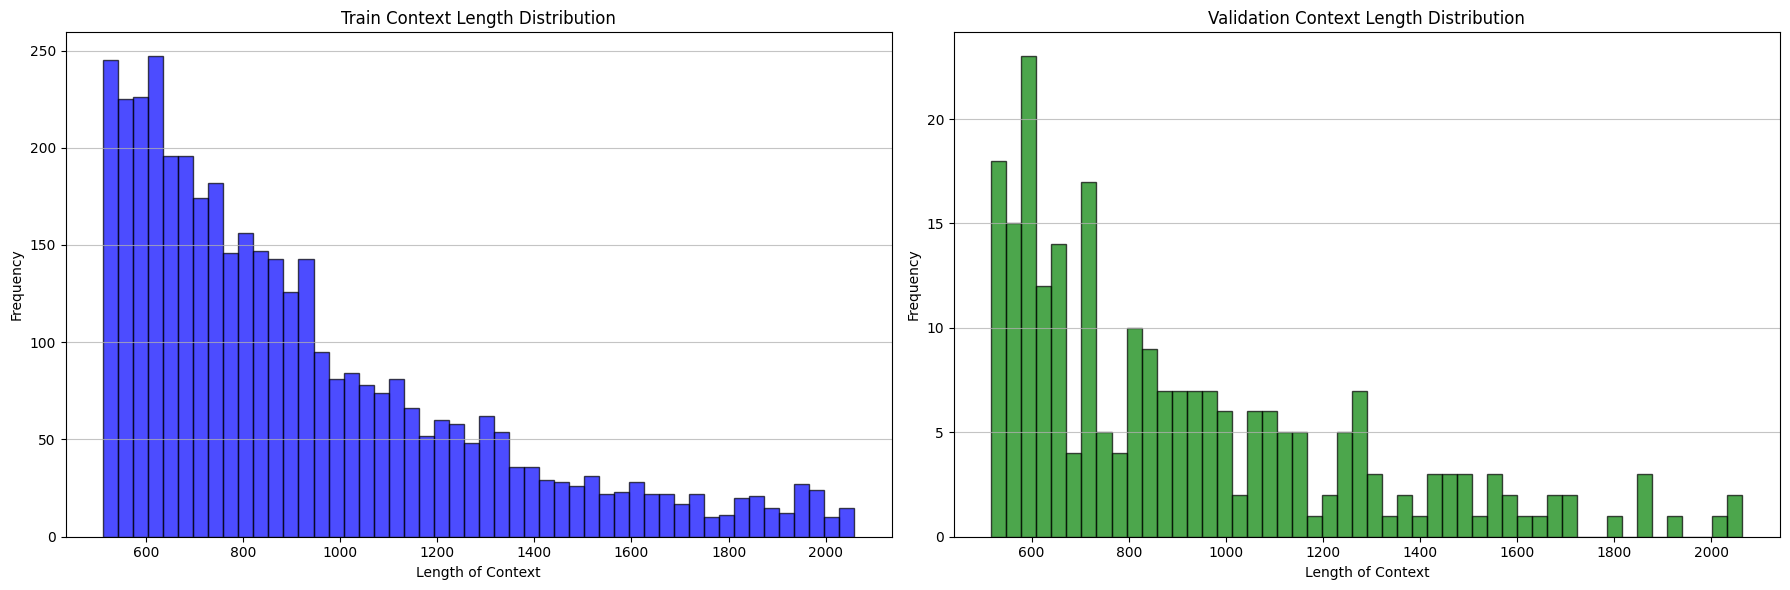

In [45]:
plt.figure(figsize=(18, 6))

# Train context 길이 분포
plt.subplot(1, 2, 1)
plt.hist(train_data['context'].apply(len), bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title('Train Context Length Distribution')
plt.xlabel('Length of Context')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Validation context 길이 분포
plt.subplot(1, 2, 2)
plt.hist(validation_data['context'].apply(len), bins=50, color='green', edgecolor='black', alpha=0.7)
plt.title('Validation Context Length Distribution')
plt.xlabel('Length of Context')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

- 2000자 이상의 너무 긴 데이터는 사용되지 않음

### train, validation 데이터의 question 길이 분포

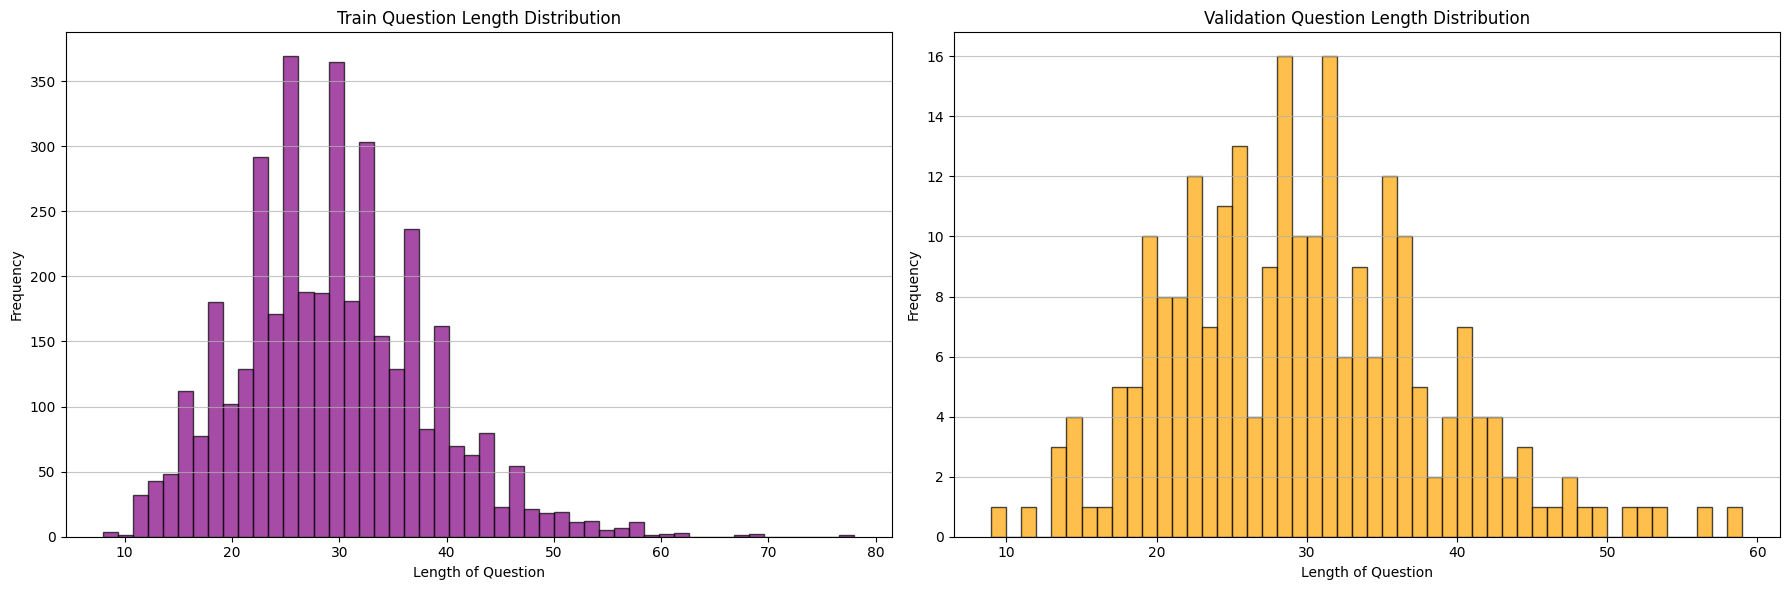

In [46]:
# 2. Question의 길이를 나타내는 그래프
plt.figure(figsize=(18, 6))

# Train question 길이 분포
plt.subplot(1, 2, 1)
plt.hist(train_data['question'].apply(len), bins=50, color='purple', edgecolor='black', alpha=0.7)
plt.title('Train Question Length Distribution')
plt.xlabel('Length of Question')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Validation question 길이 분포
plt.subplot(1, 2, 2)
plt.hist(validation_data['question'].apply(len), bins=50, color='orange', edgecolor='black', alpha=0.7)
plt.title('Validation Question Length Distribution')
plt.xlabel('Length of Question')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

### Answer의 절대적 상대적 시작 위치 분포

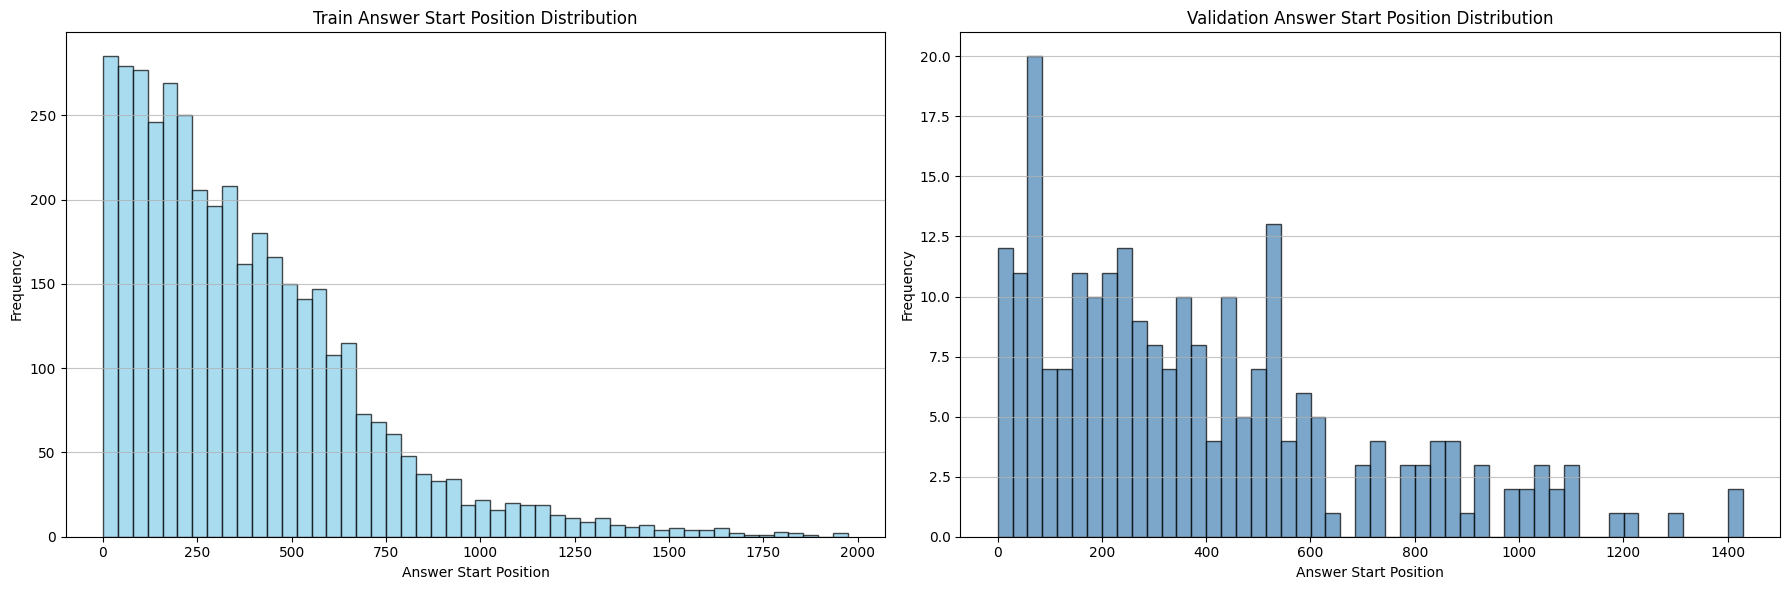

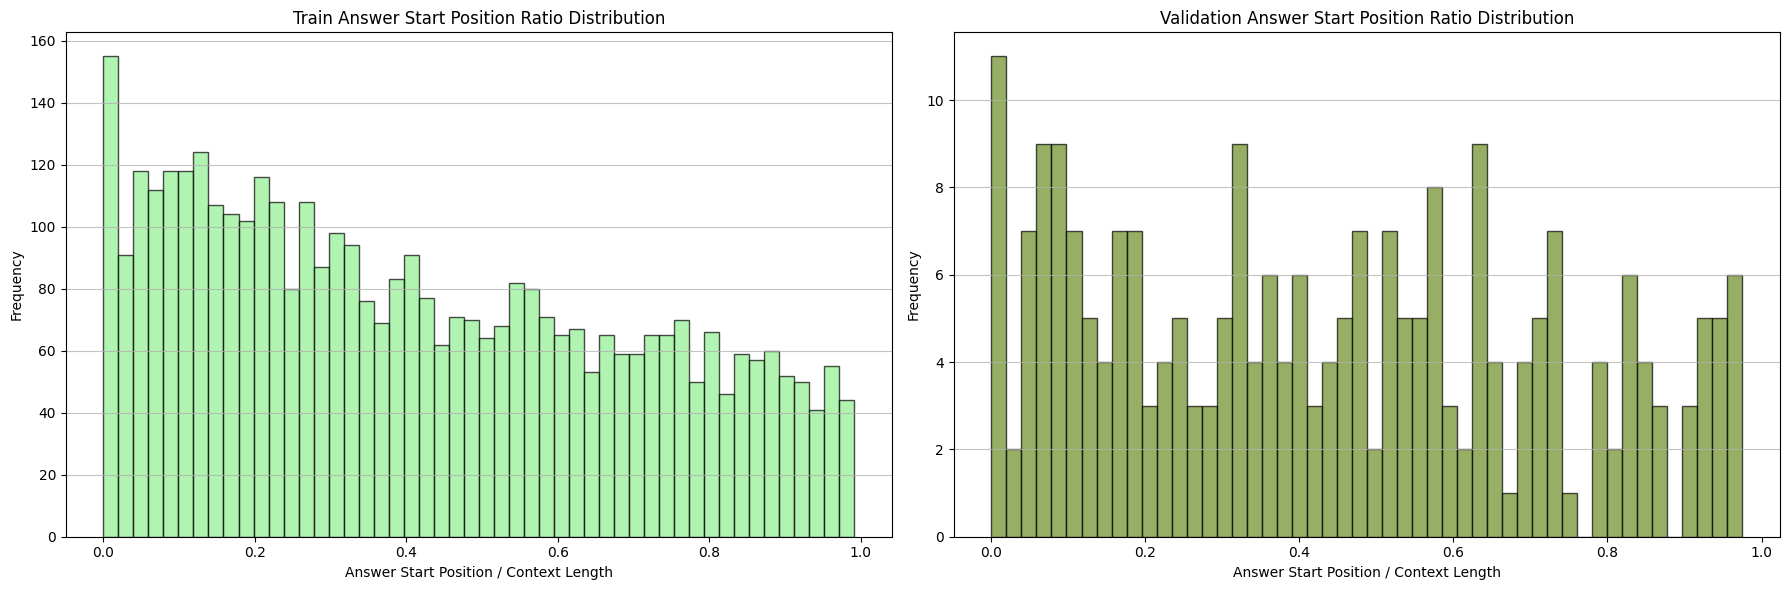

In [47]:
# 3.1 Answer의 시작 위치를 나타내는 그래프
plt.figure(figsize=(18, 6))

# Train answer 시작 위치 분포
plt.subplot(1, 2, 1)
plt.hist(train_data['answers'].apply(lambda x: x['answer_start'][0] if x['answer_start'] else 0), bins=50, color='#87CEEB', edgecolor='black', alpha=0.7)
plt.title('Train Answer Start Position Distribution')
plt.xlabel('Answer Start Position')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Validation answer 시작 위치 분포
plt.subplot(1, 2, 2)
plt.hist(validation_data['answers'].apply(lambda x: x['answer_start'][0] if x['answer_start'] else 0), bins=50, color='#4682B4', edgecolor='black', alpha=0.7)
plt.title('Validation Answer Start Position Distribution')
plt.xlabel('Answer Start Position')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()
# 3.2 Answer의 시작 위치를 context의 길이에 고려해서 나타내는 그래프 (비율)
plt.figure(figsize=(18, 6))

# Train answer 시작 위치 비율 분포
plt.subplot(1, 2, 1)
plt.hist(train_data.apply(lambda x: x['answers']['answer_start'][0] / len(x['context']) if x['answers']['answer_start'] else 0, axis=1), bins=50, color='#90EE90', edgecolor='black', alpha=0.7)
plt.title('Train Answer Start Position Ratio Distribution')
plt.xlabel('Answer Start Position / Context Length')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Validation answer 시작 위치 비율 분포
plt.subplot(1, 2, 2)
plt.hist(validation_data.apply(lambda x: x['answers']['answer_start'][0] / len(x['context']) if x['answers']['answer_start'] else 0, axis=1), bins=50, color='#6B8E23', edgecolor='black', alpha=0.7)
plt.title('Validation Answer Start Position Ratio Distribution')
plt.xlabel('Answer Start Position / Context Length')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

train data answer의 시작 위치 예시

In [48]:
# answer_start의 첫 번째 값을 추출
train_data['answer_start'] = train_data['answers'].apply(lambda x: x['answer_start'][0] if x['answer_start'] else None)
# 문서의 가장 초반에 위치한 데이터 추출 (answer_start / context_length 비율이 0에 가까운 데이터)
train_data['answer_position_ratio'] = train_data.apply(
    lambda x: x['answers']['answer_start'][0] / len(x['context']) if x['answers']['answer_start'] else 0, axis=1
)

# 가장 초반에 위치한 데이터 추출
earliest_answer = train_data.loc[train_data['answer_position_ratio'].idxmin()]

# 가장 끝에 위치한 데이터 추출 (answer_start / context_length 비율이 1에 가까운 데이터)
latest_answer = train_data.loc[train_data['answer_position_ratio'].idxmax()]

# 결과 출력
print("문서의 가장 초반에 위치한 데이터:")
print(f"Title: {earliest_answer['title']}")
print(f"Context: {earliest_answer['context']}")
print(f"Question: {earliest_answer['question']}")
print(f"Answer: {earliest_answer['answers']}")
print(f"Answer Start Position: {earliest_answer['answers']['answer_start'][0]}")
print(f"Context Length: {len(earliest_answer['context'])}")
print(f"Answer Position Ratio: {earliest_answer['answer_position_ratio']}")

print("\n문서의 가장 끝에 위치한 데이터:")
print(f"Title: {latest_answer['title']}")
print(f"Context: {latest_answer['context']}")
print(f"Question: {latest_answer['question']}")
print(f"Answer: {latest_answer['answers']}")
print(f"Answer Start Position: {latest_answer['answers']['answer_start'][0]}")
print(f"Context Length: {len(latest_answer['context'])}")
print(f"Answer Position Ratio: {latest_answer['answer_position_ratio']}")


문서의 가장 초반에 위치한 데이터:
Title: 하프라이프의 등장인물 목록
Context: 그리고리 신부(Father Grigori)는 게임 하프라이프 2의 레이븐홈 챕터에서 등장하는 캐릭터이다.\n\n그리고리 신부는 원래 레이븐홈의 러시아 정교회 성당의 신부로 지내고 있었다.\n\n고든이 레이븐홈에 도착했을 당시, 그는 그때도 마을 분위기에 비해 상당히 깨끗한 청남색 신부복을 입고 금빛 십자가가 달린 목걸이를 하고 있었으며 대머리에 비해 대조적으로 덥수룩한 턱수염을 가지고 있었다.\n\n평범한 광산 마을을 가장하고 반군기지로서 존재하던 레이븐홈은 어느날 반군의 주둔 사실을 알아챈 콤바인의 헤드크랩을 담은 로켓의 폭격을 받아 그리고리 신부를 제외한 모든 사람이 헤드크랩에 물려 좀비가 되어 마을 안을 배회하게 되었다. 목숨을 부지한 그리고리 신부는 살아남기 위해 레이븐홈을 전전하며 좀비들을 '구원하기' 위한 수많은 인공 함정을 만들어놓고 그들을 레이븐홈 내에서 소탕하기 위해 계속해서 싸운다.\n\n그러던 와중 콤바인의 습격으로 인해 블랙 메사 동부에서 도망쳐왔던 고든 프리맨과 만나게 되고, 좀비와 헤드크랩을 쏴죽이거나 좀비를 상대로 강력한 위력을 발휘하는 산탄총을 던져주는 등, 여러 도움을 주며\n고든이 끝까지 헤쳐나와 자신의 성당으로 오도록 유도한 후에 공동묘지에서 고든과 함께 윈체스터 장총으로 좀비들을 소탕하며 레이븐홈의 밖으로 나가는 곳으로 인도해준다.\n\n그를 볼 수 있는 마지막 장소인 광산 출구에서, 그는 불길 너머로 모여 드는 좀비들을 구원하며 광소(狂笑)와 함께 종적을 감춘다. 에피소드 1의 요새 붕괴로 인하여 17번 지구와 그 외곽이 방사능에 뒤덮임에 따라 그리고리 신부는 죽었을 것이라는 추측이 있지만 확실치는 않다.\n\n그리고 신부가 산탄총을 줄 때, 치트로 날아가면 신부의 총 에나벨을 얻을 수 있다.
Question: 고든 프리맨이 레이븐홈을 떠날 수 있도록 도와준 사람은?
Answer: {'answer_start': [0], 'text':

validation data answer의 시작 위치 예시

In [49]:
# answer_start의 첫 번째 값을 추출
validation_data['answer_start'] = validation_data['answers'].apply(lambda x: x['answer_start'][0] if x['answer_start'] else None)
# 문서의 가장 초반에 위치한 데이터 추출 (answer_start / context_length 비율이 0에 가까운 데이터)
validation_data['answer_position_ratio'] = validation_data.apply(
    lambda x: x['answers']['answer_start'][0] / len(x['context']) if x['answers']['answer_start'] else 0, axis=1
)

# 가장 초반에 위치한 데이터 추출
earliest_answer = validation_data.loc[validation_data['answer_position_ratio'].idxmin()]

# 가장 끝에 위치한 데이터 추출 (answer_start / context_length 비율이 1에 가까운 데이터)
latest_answer = validation_data.loc[validation_data['answer_position_ratio'].idxmax()]

# 결과 출력
print("문서의 가장 초반에 위치한 데이터:")
print(f"Title: {earliest_answer['title']}")
print(f"Context: {earliest_answer['context']}")
print(f"Question: {earliest_answer['question']}")
print(f"Answer: {earliest_answer['answers']}")
print(f"Answer Start Position: {earliest_answer['answers']['answer_start'][0]}")
print(f"Context Length: {len(earliest_answer['context'])}")
print(f"Answer Position Ratio: {earliest_answer['answer_position_ratio']}")

print("\n문서의 가장 끝에 위치한 데이터:")
print(f"Title: {latest_answer['title']}")
print(f"Context: {latest_answer['context']}")
print(f"Question: {latest_answer['question']}")
print(f"Answer: {latest_answer['answers']}")
print(f"Answer Start Position: {latest_answer['answers']['answer_start'][0]}")
print(f"Context Length: {len(latest_answer['context'])}")
print(f"Answer Position Ratio: {latest_answer['answer_position_ratio']}")


문서의 가장 초반에 위치한 데이터:
Title: 1965년 캐나다 연방 선거
Context: 1965년 캐나다 연방 선거는 캐나다에서 27번째로 치러진 연방 선거로, 캐나다 하원의원 265석을 선출하기 위해 1965년 11월 8일 진행되었다. 총 유효표는 7,713,238표가 나왔으며, 투표율은 저번 선거 대비 4%P가 떨어진 75%를 기록했다.\n\n1963년 선거로 정권을 잡게 된 레스터 B. 피어슨의 자유당은 과반수를 확보하지 못해 국정 운영에 어려움을 겪었다. 이에 피어슨은 선거가 치러진 지 2년 만에 다시 의회를 해산하고 조기 총선을 감행하였다. 선거 과정에서 자유당과 진보보수당은 모두 복지 확대를 주장하였다. 한편 사회신용당은 퀘벡 지역을 중심으로 한 세력이 당을 이탈해 신용연합을 창당하면서 두 세력으로 분열되었다.\n\n선거 결과 자유당은 의석수를 늘리기는 하였지만 과반수에는 모자란 131석을 확보하는 데 그쳤다. 진보보수당 역시 의석수를 늘리는 데는 성공했지만 정권 재교체에는 실패하였다. 선거 결과의 부진에 따라 자유당의 피어슨과 진보보수당의 디펜베이커 모두 대표직에서 물러나게 되었다. 신민주당은 의석수를 조금 늘리는 데 그쳤지만 자유당이 과반수를 확보하지 못함에 따라 캐스팅보트를 쥐게 되었다. 한편 사회신용당은 신용연합보다 못한 결과를 얻게 됨에 따라 의회 내 주도권을 상실하게 되었다.
Question: 피어슨이 다시 의회를 해산했던 년도는?
Answer: {'answer_start': [0], 'text': ['1965년']}
Answer Start Position: 0
Context Length: 630
Answer Position Ratio: 0.0

문서의 가장 끝에 위치한 데이터:
Title: 지평좌표계
Context: 지평 좌표(地平座標)는 천체 관측에서 가장 기본이 되는 좌표 체계로, 지평선이 기준선, 남점(南點) 또는 북점(北點)이 기준점이 되는데, 현재는 북점을 더 많이 사용하고 있다.\n\n지평 좌표계에서는 천체의 위치를 고도

In [50]:
def get_tokenizer():
    tokenizer = BertTokenizerFast.from_pretrained("klue/bert-base")
    return tokenizer

tokenizer = get_tokenizer()

# 토큰 ID 추출을 위한 함수
def get_token_id_count(context):
    encoding = tokenizer(context, return_offsets_mapping=True, add_special_tokens=False)
    token_ids = encoding['input_ids']
    return token_ids.count(1)  # token_id가 1인 경우의 개수 반환

# 데이터셋에 token_id가 1인 개수 추가
train_data['token_id_1_count'] = train_data['context'].apply(get_token_id_count)

# token_id가 1인 개수가 많은 상위 10개 데이터 추출
top_10 = train_data.nlargest(30, 'token_id_1_count')

# 결과 출력
top_10[['title', 'context', 'token_id_1_count']]


Token indices sequence length is longer than the specified maximum sequence length for this model (1020 > 512). Running this sequence through the model will result in indexing errors


,title,context,token_id_1_count
1018,상대성이론,"일반 상대성 이론\n\n일반 상대성 이론은 1915년에 아인슈타인이 발표하였다. (프로이센 과학 아카데미에서 1915년 11월 25일에 제출) 일반 상대성이론은 특수 상대성이론의 확장판이라 하면 이해하기 쉬울 것이다. 이 이론은 뉴턴의 고전 물리학에 결정타를 날림으로서 새로운 물리학적 이론의 길을 열었다는 점에서 의의가 있다고 할 수 있다.\n\n일반상대성이론에 대해 알아보기 전에 먼저 이를 전개하기 위해 필요한 한 가지 가정을 보도록 하자.\n\n등가원리\n-가속 좌표계에서 지구로 인해 생기는 중력과 중력가속도g와 같은 크기의 가속도 a로 중력의 작용방향과 반대로 운동하는 것으로 인한 관성력은 구분할 수 없다.\n\n즉, 관성질량과 중력질량이 같은 측정값을 지닌다는 것이다.\n\n1. 시공간\n일반 상대성 이론에서 아인슈타인은 '시공간은 4차원, 즉 시간과 공간이 결합된 형태의 연속체'임을 규명했다. 뉴턴이 시공간이 시간과 공간으로 분리되어 서로 영향을 주고받지 않는 별개의 공간인 점과, 공간위의 한 점에 위치한 물체에 어떠한 영향도 받지 않을 것이라고 생각한 반면에 아인슈타인의 사고실험에서 아인슈타인은 시공간이 서로 상호작용함과, 공간위에 위치한 어떠한 질량을 가진 물체에 대하여 공간이 휘어짐을 제시하였다.\n\n2. 중력\n아인슈타인은 뉴턴의 중력을 가속운동계에 적용시켰다. 그는 중력가속도g의 크기만큼 가속하는 가속계 내의 물체와, 중력을 받고있는 물체는 서로 구분이 불가능하다는 이론을 내세움으로서 가속계를 관성계로 해석가능함을 보였다.\n\n3. 중력으로 인한 시간팽창\n위에서 가속계 역시 관성계로 인식할 수 있다고 하였다. 따라서 가속계의 물체는 관성계에서 물체의 이동으로 판단할 수 있고, 특수 상대성이론에 따라 시간지연이 일어남을 알 수 있다. 이로서 중력을 받는 물체는 그 물체에 흐르는 시간이 느려지게 된다.\n\n4. 공간 왜곡으로 일어나는 현상\n4-1. 빛의 휘어짐 : 빛의 움직임을 가속운동계에 적용시켜보면, 그 빛이 휜다는 것을 알 수 있을 것이다. 따라서 중력으로 인하여 빛이 휜다는 것을 알 수 있다\n\n4-2. 중력렌즈효과 : 이는 일식이 일어날 때 관측할 수 있는 현상인데, 바로 태양의 뒤에 위치하여 가려져 있던 천체가 태양의 중력에 의한 영향으로 그 빛이 휘어져 우리눈에 들어오는 것이다. 흔히 '아인슈타인의 십자가'라는 것이 이로 인한 현상이다.\n\n4-3. 블랙홀 : 질량이 매우 큰 천체는 공간을 심하게 왜곡하여 빛마저 삼켜버릴 수 있다.\n\n5. 일반상대성이론의 증거\n① 에딩턴의 태양의 일식 관측 : 지구에서 별을 관측할 때, 별과 지구사이에 태양이 있을 때와 없을 때의 별의 관측위치를 비교하여 빛이 휘는 것을 관찰\n\n② 수성의 세차운동 : 뉴턴의 이론에 따라 계산하면 100년동안 574´´만큼 이동해야 하지만, 실제 세차운동 관측결과 43´´정도 오차가 났다. 하지만 일반상대성 이론에 시공간의 곡률을 고려한 결과 이 차이를 정확히 설명\n\n③ 중력렌즈 : 중력이 렌즈처럼 빛을 휘게 하는 현상이다. 대표적으로 퀘이사가 있다.(퀘이사는 은하의 중력 때문에 지구에서 4개의 빛나는 쌍둥이별로 오인했었다.)\n\n④ 중력파 : 천체의 중력붕괴나 초신성폭발 같은 우주현상으로 발생하여 시공간이 일그러짐이 광속으로 파도처럼 전달되는 것을 말한다.(이전까지 발견되지 않고있다가 최근 블랙홀에서 발견되었다.)\n\n⑤ GPS : 인공위성이 움직이기 때문에 시간차이가 생기는데 속력과 중력의 작용을 고려하여 보정해줘야 한다.\n\n⑥ 블랙홀 : 질량이 매우 큰 천체는 공간을 휘게하여 천체를 지나는 빛마저 흡수한다.(아인슈타인이 2차원의 평면에 시간의 곡률을 표기한 그림에서 보면 블랙홀은 질량이 극도로 커 평면 자체가 엄청나게 움푹 들어가있다. 이때 블랙홀의 부분중 넘게되면 빛조차 절대 빠져나올수 없는 선이있는데 이곳을 사건의 지평선이라고 하며 이 안쪽부분은 어떠한것도 빠져나오지 못하므로 검게보인다.)",40
1145,윤치호,"민족자결주의\n1916년 조선총독부는 여러 번 사람을 보내 그에게 당국 시책에 협조해줄 것을 요청한다. 그러나 윤치호는 대답을 회피하거나 거절한다. 1916년 YMCA 기독교 청년회 제4대 총무로 취임한다. 1918년 겨울 한국의 독립운동가들은 윌슨의 민족자결주의에 고무되어 1919년 1월에 열리는 프랑스 파리강화회의의 대표자를 선발하여 보내려 하였다. 그러나 윤치호는 회의적이었다.\n\n1919년 1월 하순에 윤치호와 박희도(朴熙道)는 연희전문학교의 학생인 김원벽(金元璧)을 중간에 두고 강기덕(康基德)·주익(朱翼)·한위건(韓偉鍵)·김형기(金炯璣)·이공후(李公厚)·주종선(朱鍾宣) 등 학생들과 독립만세 시위운동을 협의하였다. 1919년 1월 17일에 신흥우가 그에게 파리강화회의에 갈 의향을 타전해 왔다. 그러나 그는 거절했다.\n\n신흥우 군이 찾아와 내게 유럽 파리에 갈 의향이 있느냐고 물었다. 그는 계속해서 약소국에 소요가 일어나는 것과 조선에서 소요가 발생하는 것에 대해 어떻게 생각하느냐고 물었다. 나는 이렇게 대답했다. ""세계대전과 관련 있는 약소국 문제는 파리강화회의에서 틀림없이 안건으로 상정될 걸세. 그러나 조선은 거론될 기회조차 없을 거야. 파리강화회의에서 조선에 대한 암거래는 제쳐놓고, 직간접적으로 세계대전과 관련 있는 약소국들 문제를 해결하는데 주력할 걸세. ""|윤치호 일기|1919년 1월 17일자\n\n \n그날 송진우(宋鎭禹)가 찾아와 '국제연맹이 창설될 것이며, 약소국에 자결권이 주어지지 않는다면 이 기구는 아무런 의미도 갖지 못할 것 '이라고 했다. 그리고 '만일 이러한 이상적인 방안이 거부된다면 미국이 일본에 선전포고를 할 수도 있을 '이라 주장했다. 송진우가 3·1 운동에 동참해달라고 했을 때 그는 “조선문제는 파리강화회의에서 안건으로 상정되지 않을 것이며, 열강중 어느 나라도 바보처럼 조선문제를 거론해서 일본의 비위를 거스르지 않을 것”이라고 말하고, 독립만세 운동참여를 거절했다. \n\n \n윤치호는 파리강화회의에 기대를 거는 송진우를 설득시키려 하였다. 윤치호에 다음 이유등을 들어 강화회의에 기대를 접을 것을 권고했다.\n\n\n\n그러나 송진우는 윤치호가 일본인들의 힘을 과대평가한다고 생각했다 파리강화회의를 부정적으로 평가하고 3.1 만세운동에 서명하지 않았으며 외교독립론 조차 부질없는 것으로 평가절하하는 그의 태도에 대한 청년층의 비난이 빗발쳤다. 1919년 1월에 프랑스 파리에는 파리강화회의에서 내세운 민족자결주의에 고무된 호찌민이 베트남의 독립을 요구하는 성명서를 들고 나타났다. 그러나 그는 자신이 순진하다는 것을 깨달았다. 베트남 독립운동을 주도하던 호찌민의 활동을 보고 그는 소용없는 행동으로 봤다.\n\n윤치호에게 만세 운동에 적극 나서줄 것을 호소하려는 젊은이들이 수시로 찾아왔다. 그는 정의롭거나 도덕적으로 우월한 국가나 이념이 세계를 지배한 것은 아니라고 봤다. 외관 상 평화와 정의를 표방하지만, 현실은 국력과 무력이 세계를 실제적으로 움직인다는 것이었다. 젊은이들은 도덕적 이상은 보편타당한 진리라고 했지만, 윤치호는 도덕적으로 우월한 국가는 존재할 수 없으며, 존재한다고 해도 도덕적으로 우월한 국가나 개인이 반드시 세상을 주도하거나 지배하는 것은 아니라며 반박하여 되돌려보냈다.\n\n이어 종로청년회관으로 신익희가 윤치호를 찾아가 세계 대세와 국내 정형을 설명하며 독립운동에 동참을 권하였다. 그러나 윤치호는 기회가 아니라며 사절하였다. 무참하게 거절당한 신익희는 그를 소인배라며 질타하고 일어섰다.\n\n윤치호는 호찌민과 같은 청년들의 좌절을 이미 예고하고 있었다 미국이나 다른 강대국들이 자국의 이익이 되지 않는다면 왜 약소국이나 후진국을 도와주겠느냐는 것이었다.\n\n1월 21일 고종이 갑자기 사망했다. 당시 고종 독살설과 자살설이 시중에 확산되고 있었으나 그는 시위를 이끌어내기 위해 지식인들이 유포한 루머 정도로 치부했다. 그러나 그는 궁궐에 이미 일본에게 매수당한 내관이나 의원들이 있다는 것도 알고 있었다. 1년 뒤, 사돈인 한진창에게서 고종 독살설의 

In [51]:
from IPython.display import display, HTML

In [52]:
UNK_token_idx=1018
display(HTML(train_data.iloc[UNK_token_idx]['context']))

In [53]:
train_titles = set(train_data['title'])
wiki_titles = set(wiki_data['title'])
validation_titles = set(validation_data['title'])
# 겹치는 title 찾기
common_titles = train_titles.intersection(wiki_titles)
common_titles_val = validation_titles.intersection(wiki_titles)
# 결과 출력
common_titles_list = list(common_titles)
common_titles_list_val = list(common_titles_val)

print(f"wiki와 train data의 겹치는 title의 수: {len(common_titles_list)}")
print(f"wiki와 validation data의 겹치는 title의 수: {len(common_titles_list_val)}")

wiki와 train data의 겹치는 title의 수: 2701
wiki와 validation data의 겹치는 title의 수: 226


In [54]:
print(len(train_data['title']))
print(len(train_titles))
print("중복되는 title의 수: ",len(train_data['title'])-len(train_titles))

3952
2716
중복되는 title의 수:  1236


- train data의 unique한 타이틀 수: 2716
- wiki와 train data의 겹치는 title의 수: 2701
- **15개는 wiki에는 없지만 train data에 있는 문서라는 뜻**

### wiki 문서에는 없지만 train data에는 있는 문서

In [55]:
train_titles_not_in_wiki = train_titles - wiki_titles

# train 데이터에서 wiki에 없는 title에 해당하는 행을 추출
train_data_not_in_wiki = train_data[train_data['title'].isin(train_titles_not_in_wiki)]

# title과 context를 출력할 수 있도록 DataFrame으로 생성
train_data_not_in_wiki_info = train_data_not_in_wiki[['title', 'context', 'document_id']]
train_data_not_in_wiki_info

,title,context,document_id
291,고레인저,"수수께끼의 UFO들과 유럽에서 가면 라이더 V3과 싸우던 철면 군단, 사하라 사막에서 고레인저와 싸우던 사하라 군단, 몽골에서 키카이다와 싸우던 권투사 군단이 텔레비전 시리즈 《재커 전격대》의 극중에서 죽은 것의 철의 손톱(아이언 크로)앞에 집결하고 범죄 조직 범죄를 재결성, 과학 특수대의 연료 부대를 습격하고 강탈한 우라늄을 바탕으로 수소 폭탄을 제조하고 세계를 정복하려는 범죄에 재커와 고레인저가 맞서 스토리 하고 있다.\n\n고레인저의 5명 중 변신 전의 모습은 페기 마츠야마(모모 레인저)밖에 등장하지 않지만 미도레인저와 키레인저의 목소리는 오리지널 캐스트 가 담당하고 있다. 또 미 드레인 밥솥의 목소리는 텔레비전 시리즈의 뱅크를 재사용하고 아카 레인저의 목소리는 뱅크 음성과 대역의 목소리를 병용했다.\n\n도에이 만이 축제에서는 이미 애니메이션 영화로서 나가이 고우 원작 작품들이 경연하다 극장판 마징가 시리즈(《마징가 Z-데블맨》, 《그레이트 마징가-게터 로보》 등)이 선례로 삼고 있었지만 특수 촬영 작품에서는 본 작품이 유일한 경연 작품이다. 또 본 작품에서는 세계 각지에서 다른 이시 모리 특촬 히어로가 싸운다는 묘사가 이루어지며 악역에도 아마모토, 안도, 조수 등 각 작품에서 활약한 배우가 기용되는 등, 이시노모리 히어로 작품의 집대성적 작품이 된다.\n\n《재커 전격대》를 마지막으로 상영 당시에는 다수 제작된 이시모리 쇼타로 원작의 도에이 특수 촬영 작품의 대부분이 종료하고 있다.\n\n복수의 슈퍼 전대가 경연하고 적과 싸우는 스타일은 18년 후의 1996년부터 시작된 오리지널 비디오 작품 시리즈 〈슈퍼 전대 V시네마〉에 인계되어 있다. 또 이시 모리 원작의 토에이 작품의 연결을 영상으로 명확히 그려진 몇 안 되는 작품의 하나인(""아마존에서는 가면 라이더 아마존이 십면 귀과 싸우고 있다""등의 언급도 있다).",45631
389,힐,"힐은 전쟁중에 논쟁을 피하지 못했다. 병약한 체질이라서 여러 번 병치레를 했기에, 게티스버그, 와일드넌스 및 스폿트실베니아 코트 하우스(Spotsylvania Court House)의 각 전투에서 자신의 유효성을 감소시켰다(역사가들 중에는 힐이 성병(性病), 무서운 임질의 합병증을 앓고있어, 웨스트포인트 사관후보생시대에 나환이라고 믿는 사람도 있었다. 사관학교 병원기록에는 1844년 9월 9일 일시 휴가를 얻어 나환인 임질의 치료를 받았던 것으로 기록되어 있다 ）. 역사가 래리 터그(Larry Tagg)는 힐을 가리켜 [항상 감정적이어서...전투전에 소모되어 전투가 시작될 때쯤에는 몸의 상태가 그리 좋지 않은 경향이 늘어났다]라고 말했다. 그 경향은 그가 나타내는 자신있는 모습의 태도와 전투적인 자세에 의해 어느 정도 균형을 이루었다.\n그는 자주 빨간 모직의 수렵용 셔츠를 입었고, 이것을 [전투용 셔츠]라고 불렀다. 전투가 얼마안가 시작될 때쯤 부하들은 [좀 있으면 파웰이 전투 셔츠를 입을거다]라고 말이 전해지면, 무기를 검사하기 시작했다 .\n\n힐은 일반 병사에게도 애착을 갖고 있었고, 어느 장교는 그를 가리켜 [리 장군의 휘하 장군들중에서 가장 사랑스런사람]라고 말했다. [그의 는 아무리 정직해도 거의 결단을 잃었다]라고도 말하지만, 그 행동은 성급함 때문에 결단을 잃어버린 것은 아니다. 다만 때에 따라서 결단을 잃어버렸. 게티스버그에서 리 장군의 전군이 움직이기 전인 7월 1일에 힐이 선택한 것으로 보이는 행동은 널리 비판을 받았다.\n\n그런데도 힐은 이 전쟁에서 양군진영에서 가장 높은 존경을 받은 장군 중 한 명이었다. 힐이 소장이었을때, 로버트 E. 리 장군은 남군의 당시 소장들중에서 가장 훌륭한 사람이라고 기록했다. 힐은 결국 결정적인 순간에 전장에 도착해 승리를 확보했다는 평판을 얻었다(예를 들면 앤티텀, 시더산 및 제2차 불런의 각 전투에서). 스톤월 잭슨은 자신의 죽기전 병석에서 힐에게 [전투준비]을 요구했다. 리 장군도 임종시에 힐을 불렀다(힐에게 지금 오라고 지시했다)라는 기록도 있으나, 최근 의학계의 의견에서는 리 장군은 마지막 병세때 말도 할 수 없었을 거라고 생각하고 있다.",9473
477,와그너,"1929년 후순 대공황의 습격과 함께 와그너는 평범한 시민과 근로자에게 경제적 구호를 가져오는 데 추구하였다. 허버트 후버 대통령의 기간 동안 와그너는 향상된 노동 통계의 수집 및 추적, 그리고 실업자들을 원조할 공공 사업 계획들에 자금을 지원하는 데 정부 지출 부족을 위하여 밀고 나갔다. 공공 사업 계획들은 도로, 공공 건물과 공원들의 건설을 포함한 정부에 의하여 지원되었으며 이 계획들은 많은 새로운 직업들을 창조하였다. 와그너는 직업들이 산업의 회복을 자극할 구매력을 증가시킬 것이라고 믿었다. 후버에 의하여 하나의 공공 사업 법안이 거부된 후 와그너는 1932년 후버가 마지못해 서명한 긴급 구호 건설 법령을 통하여 밀고 나갔다.\n\n1933년 프랭클린 D. 루스벨트에 의하여 이끌어진 민주당원들이 권력으로 들어왔다. 와그너는 루스벨트의 뉴딜 프로그램들의 지도적인 성원자와 옹호자가 되었다. 그는 1933년 연방 긴급 구조 법령과 민간 산림 보호대의 후원자로서 시작하였다. 둘다 실업자들을 위하여 직업들을 마련하였다. 와그너는 주요 산업적 회복 입법을 제정하는 데 지도적인 역할을 하였다.",59363
536,케네디,"케네디는 1962년 11월 7일 테드 케네디는 연방 상원으로 선서되었다. 그는 그가 처음 상원에 들어갔을 때 이전의 남부 의원들을 향하여 비방적인 태도들을 유지하였다. 그는 상원에서 선임 제도를 인식하여 홍보를 피하였고 위원회의 업무와 지방 문제들에 전념하였다. 사무직에서 자신의 형들과 비교된 그는 존의 복잡화와 로버트의 강렬함을 부족하게 하였고 어쩌다 격자의 정력이었으나 그들 중 어느 한쪽보다 더욱 상냥하였다.\n\n1963년 11월 22일 자신의 형 존 F. 케네디 대통령이 암살되었다는 것을 측근자가 그에게 말하는 데 서둘렀을 때 케네디는 연소 회원들에게 주어진 직무 - 상원에 주재하고 있었다. 그의 형 로버트가 곧 그에게 대통령이 사망했다고 말하였다. 테드와 그의 누이 유니스 케네디 슈라이버는 2년 일찍이 겪은 뇌졸중에 의하여 괴로워해 온 자신들의 병약한 부친에게 소식을 전하는 데 즉시 매사추세츠주 하이야니스포트로 날아갔다.\n\n그의 사망한 형의 냉전 통로에 이어 케네디는 시초적으로 베트남 전쟁에서 미국의 역할을 확장시키는 것에 관하여 ""예약이 없었다고"" 말하였고 그것이 ""길고 지속적인 투쟁""일 것이라고 승인하였다. 케네디는 난민들 을 위하여 미국 정부가 일관된 정책을 가지지 않았다는 것을 공개한 논쟁에서 난민들의 상태에 청문회를 열었다. 케네디는 또한 징병의 ""불공평""하고 ""불공정""한 측면을 개혁하는 데 노력하였다. 베트남으로 여행을 떠난 1968년의 1월까지 케네디는 미국의 진보의 부족으로 환멸되었고 미국이 남베트남에 ""모양을 만들거나 우리는 발송할 것입니다.""라고 말해야 할 것을 공개적으로 제안하였다. 그해 3월 31일 린든 B. 존슨 대통령은 자신이 1968년 미국 대통령 선거를 다시는 추구하지 않을 것이라고 놀라운 공고을 하였다.\n\n 테드는 시초적으로 1968년 대통령 선거에서 민주당 후보 지명을 위한 도전에 자신의 형 로버트를 조언하였다. 한번 뉴햄프셔주 예비 선거에서 유진 매카시의 강한 모습은 그해 3월에 시작된 로버트의 대선 운동으로 이끌었으며 테드는 서부의 주들에서 자신의 형에게 보증을 위하여 정치 지도자들을 고용하였다. 6월 4일 로버트가 결정적인 캘리포니아주 예비 선거를 이겼을 때 테드는 샌프란시스코에 있었고 그러고나서 한밤 중 후에 로버트는 로스앤젤레스에서 암살되어 다음날에 사망하였다. 테드 케네디는 케네디 가에서 그것들 중에 로버트에게 자신이 가장 가까우면서 자신의 형의 사망에 의하여 황폐해졌다. 케네디의 측근 프랭크 맨키에비치는 로버트가 치명상을 입은 채로 누워있던 병원에서 테드를 본 것에 이렇게 말하였다. ""나는 더욱 슬픔에 잠긴 얼굴을 보는 데 결코, 결코, 결코 기대하지 않는다.""\n\n자신의 형들의 사망 후에 케네디

In [56]:
validation_titles_not_in_wiki = validation_titles - wiki_titles

# validation 데이터에서 wiki에 없는 title에 해당하는 행을 추출
validation_data_not_in_wiki = validation_data[validation_data['title'].isin(validation_titles_not_in_wiki)]

# title과 context를 출력할 수 있도록 DataFrame으로 생성
validation_data_not_in_wiki_info = validation_data_not_in_wiki[['title', 'context', 'document_id']]
validation_data_not_in_wiki_info

,title,context,document_id
87,와그너,"제2차 세계 대전 후에 와그너는 노동, 사회 보장, 완전 고용 (취업 기회들이 풍부하고 실업률이 6 퍼센트 아래 있던 경제 상태), 주택 공급, 국제 경제 원조, 팔레스타인에 유대인 국가의 창조와 북동부에서 세인트로렌스 수로의 경제 개발을 포함한 광범위한 문제들에 다시 한번 연루되었다. 와그너는 공공 주택 공급과 도시 재개발을 흥행하는 입법과 유대인의 국가 이스라엘이 1948년 현실이 된 성공을 가졌다. 해리 트루먼 대통령의 강한 성원과 함께 와그너는 또한 국내 건강보험과 민권을 위한 입법을 흥행하기도 하였다. 하지만 보수적 의회는 와그너의 제안들을 통과시키는 데 더욱 어렵게 만들었다. 의회가 트루먼의 거부에 태프트-하틀리 법령을 통과시켰을 때 주요 패배가 왔다. 법령은 국내 노동 관계 법령을 수정하였고, 이전의 10년간 세월에 와그너가 노동력 달성을 도운 권력을 줄였다.\n\n자신의 건강 상실과 함께 와그너는 1949년 6월 28일 상원으로부터 조용히 사임하였다. 자신의 퇴직에 그는 인권을 위한 싸움에서 패배보다 더욱 많은 입법적 승리들을 간주할 수 있었다는 것을 자랑스럽게 선언하였다. 자신의 공헌의 세월 동안 와그너는 진보적인 정치의 상승을 반영하였고 이민자들의 정치력을 증가시켰다.",59365
105,댈러스,"1839년 귀국 후 댈러스는 제임스 뷰캐넌이 거부한 후 법무장관 직이 제공되었으나 거절하였다. 댈러스는 후에 15대 대통령이 된 동료 펜실베이니아주 출신 뷰캐넌의 정치적 라이벌이었다. 경쟁은 ""가족당""과 ""합병자"" 사이에 펜실베이니아주 민주당의 권력 분투에 뿌리가 두어졌다. 댈러스는 가족당을 지도하였고, 그들은 헌법의 주권와 보호 관세, 강한 중앙적 은행 제도를 통하여 국가 상업을 용이하게 하고 국내 향상을 흥행하는 활동적인 국가 정부를 믿었다. 뷰캐넌은 펜실베이니아주 서부의 농부들에 힘이 놓인 합병자를 이끌었다.\n\n1844년 5월 대통령으로 지명된 제임스 K. 포크는 사일러스 라이트가 부통령직을 거절한 후 댈러스에게 그 직을 제공하였다. 댈러스는 부통령으로 선출되어 1845년 3월 선서하여 1849년까지 재직하였다. 댈러스는 상원의 사회자로서 영향력이 있었다. 그는 포크의 의사 일정을 지지하고 많은 최종결정 투표들을 하는 데 일을 하였다. 댈러스는 멕시코-미국 전쟁이 일어난 동안 오리건 영토들과 멕시코의 전부의 병합을 요구하기도 했다. 그는 미국의 이 지역들의 일부 병합과 함께 만족했다.\n\n댈러스는 1948년 미국 대통령 선거를 위하여 대통령을 위한 경쟁자로서 자신을 조종하려고 했다. 하지만 관세를 낮추는 데 그의 꺼리는 투표는 펜실베이니아주에서 그의 기지를 파괴하였다. 노예제에 국민 주권에 관한 그의 옹호는 그에 대항하는 반대를 강화하였다. 그는 포크 대통령이 뷰캐넌을 국무장관으로 임명했을 때 당의 지지에 관한 희망을 잃었다. 1856년 그는 프랭클린 피어스 대통령에 의하여 영국 주재 공사로 임명되어 1861년까지 지냈다.",27402


In [57]:
# 특정 title을 가진 데이터 추출
title_to_find = "헨드릭스"

wiki_specific = wiki_data[wiki_data['title'] == title_to_find]
train_specific = train_data[train_data['title'] == title_to_find]
validation_specific = validation_data[validation_data['title']==title_to_find]
# 결과 출력 
wiki_specific

,text,corpus_source,url,domain,title,author,html,document_id,context_length


In [58]:
train_specific

,title,context,question,id,answers,document_id,__index_level_0__,answer_start,answer_position_ratio,token_id_1_count
962,헨드릭스,"항상 야망적이었던 헨드릭스는 정치에 뛰어들었다. 그는 1848년 인디애나주 연방 하원으로 선출되어 1849년 주의 헌법 집회에서 대표단으로 지냈고, 1850년 연방 상원에서 의석을 이겼다. 하원의 인기있던 의원이었던 그는 일리노이주 민주당 상원 스티븐 A. 더글러스의 신봉자가 되어 더글러스의 논쟁적 캔자스-네브래스카 법령을 지지하였다. 그 법령은 미주리 타협을 무효로 하였고, ""국민 주권""으로 알려진 개념으로 노예제 허용 여부를 결심하는 데 영토들의 주민들을 허락하였다. 북부에서 대중의 분노는 옛 휘그당의 해산과 결국적으로 새로운 공화당의 출현에 결과를 가져온 정치적 불안정의 시기를 일으켰다. 헨드릭스는 캔자스-네브래스카 법령을 위한 자신의 투표가 그것이 후에 1854년 재선을 위한 자신의 패배의 원인으로서 인용되었어도 자신의 구성 요소의 감정을 반영하였다고 믿었다. 그는 자유 군인, 노예제 폐지론자, 절제 옹호자, 노우 나씽과 휘그당원들의 연립을 대표한 전 민주당원에 의하여 반대되었다. 헨드릭스는 노우 나씽 운동의 출생주의를 비난하였고 이민자들과 종교적 소수 민족들의 권리들을 방어하였다. 소수 민족의 권리들을 위하여 이 훌륭한 입장들에 불구하고, 그는 인종 문제에 맹목적이었다. 1849년 인디애나주 헌법 집회의 대표단으로서 그는 인종적 분리를 흥행하고 자유 흑인들의 주에 들어오는 이동을 제한시킨 ""흑인법""을 제정하는 데 운동을 이끌었다.\n\n의회에서 자신의 의석을 패한 후, 헨드릭스는 1855년 자신이 1859년를 통하여 보유한 직위로 내무부의 일반 토지국의 위원이 되는 데 프랭클린 피어스 대통령으로부터 임명을 받아들였다. 더글러스파의 민주당원으로서 그는 반더글러스파의 제임스 뷰캐넌 행정부와 점점 벗어나는 느낌이 들었고, 자신의 직무로부터 사임하여 인디애나주로 돌아와 1860년 주지사를 위하여 비성공적으로 출마하였다. 그는 그러고나서 인디애나폴리스로 이주하여 법률을 실행하였다.",미주리 타협을 무효로 하는 법은?,mrc-0-002768,"{'answer_start': [168], 'text': ['캔자스-네브래스카 법령']}",20114,1818,168,0.175916,2
3202,헨드릭스,"선거의 실망 후에 헨드릭스와 그의 부인은 유럽을 통하여 장기적 여행과 함께 자신들을 위로하였다. 그는 자신의 법률 실행으로 돌아와 하루의 문제들에 지속적으로 터놓고 말하였다. 인디애나주의 주민들은 헨드릭스의 전기작가들 중에 하나가 적어두면서 ""연설을 사랑하는 주민들""이었고, 큰 관중들은 항상 그의 연설에 나타났다. 1880년 인디애나주는 다시 한번 대통령을 위하여 헨드릭스를 후원하였으나 그가 아칸소주 핫스프링스에서 휴가를 즐기고 있던 동안 헨드릭스는 뇌졸중을 겪었다. 2년 후에 그는 하나의 발에 절름발이가 되었다. - 헨드릭스의 빈법한 대중 연설 참여에 관하여 저널리스트 벤저민 펄리 푸어에 의하여 결과는 다음과 같이 단언되었다.\n\n\n그가 자신의 오른발의 끝에 앞으로 구부리는 버릇이 있던 동안 그 위에 전체 무게를 달았다. 그의 발가락 중 하나에 붓기가 생긴 그의 오른쪽 신발의 압력으로부터 ... 24 시간에 단독이 발생하였고, 그것은 그가 회복한 6개월간 병이 걸렸던 후의 만이었다. 그러나 그는 항상 나중에는, 특히 자신이 피곤했을 때 다소 절름발이였다.\n\n1884년 미국 대통령 선거가 접근하면서 또한 마비성 뇌졸중을 겪은 새뮤얼 J. 틸던은 자신의 옛 러닝메이트 토머스 헨드릭스가 틸던-헨드릭스의 1876년 공천 후보의 반복을 원했다는 것을 신문 기자에게 언급하여 ""내 약점을 고려하면 궁금하지 않습니다.""라고 말하였다. 틸던은 민주당의 후보 지명을 활짝 열어 놓은 경주로부터 자신의 철회를 공고하였다. 아무도 헨드릭스가 1884년 후보 지명을 위하여 유효했다는 것을 의심하지 않았으나 1868년 이래 모든 대통령 선거에서 그의 지속적인 가용성은 그의 후보직을 평가 절하하였다. 당은 그들을 연합하여 소수에서 많은 세월 후에 승리로 그들을 지도하는 데 새로운 얼굴을 찾았다. 헨드릭스는 ""과도한 야망""의 남자로서 면직되었다.",헨드릭스는 어디로 휴가를 갔다가 뇌졸중을 앓았나요?,mrc-0-004774,"{'answer_start': [221], 'text': ['아칸소주 핫스프링스']}",20117,3115,221,0.239437,5


In [59]:
validation_specific

,title,context,question,id,answers,document_id,__index_level_0__,answer_start,answer_position_ratio


In [60]:
wiki_data.iloc[45631]

text              수수께끼의 UFO들과 유럽에서 가면 라이더 V3과 싸우던 철면 군단, 사하라 사막에서 고레인저와 싸우던 사하라 군단, 몽골에서 키카이다와 싸우던 권투사 군단이 텔레비전 시리즈 《재커 전격대》의 극중에서 죽은 것의 철의 손톱(아이언 크로)앞에 집결하고 범죄 조직 범죄를 재결성, 과학 특수대의 연료 부대를 습격하고 강탈한 우라늄을 바탕으로 수소 폭탄을 제조하고 세계를 정복하려는 범죄에 재커와 고레인저가 맞서 스토리 하고 있다.\n\n고레인저의 5명 중 변신 전의 모습은 페기 마츠야마(모모 레인저)밖에 등장하지 않지만 미도레인저와 키레인저의 목소리는 오리지널 캐스트 가 담당하고 있다. 또 미 드레인 밥솥의 목소리는 텔레비전 시리즈의 뱅크를 재사용하고 아카 레인저의 목소리는 뱅크 음성과 대역의 목소리를 병용했다.\n\n도에이 만이 축제에서는 이미 애니메이션 영화로서 나가이 고우 원작 작품들이 경연하다 극장판 마징가 시리즈(《마징가 Z-데블맨》, 《그레이트 마징가-게터 로보》 등)이 선례로 삼고 있었지만 특수 촬영 작품에서는 본 작품이 유일한 경연 작품이다. 또 본 작품에서는 세계 각지에서 다른 이시 모리 특촬 히어로가 싸운다는 묘사가 이루어지며 악역에도 아마모토, 안도, 조수 등 각 작품에서 활약한 배우가 기용되는 등, 이시노모리 히어로 작품의 집대성적 작품이 된다.\n\n《재커 전격대》를 마지막으로 상영 당시에는 다수 제작된 이시모리 쇼타로 원작의 도에이 특수 촬영 작품의 대부분이 종료하고 있다.\n\n복수의 슈퍼 전대가 경연하고 적과 싸우는 스타일은 18년 후의 1996년부터 시작된 오리지널 비디오 작품 시리즈 〈슈퍼 전대 V시네마〉에 인계되어 있다. 또 이시 모리 원작의 토에이 작품의 연결을 영상으로 명확히 그려진 몇 안 되는 작품의 하나인("아마존에서는 가면 라이더 아마존이 십면 귀과 싸우고 있다"등의 언급도 있다).
corpus_source                                                 

**title의 라벨링이 잘못되어 있는 거 였음**(validation도 마찬가지)

In [61]:
display(HTML(train_data['context'][4]))

In [62]:
# wiki 데이터에서 필요한 document_id에 해당하는 행을 찾음
wiki_data_matching_ids = wiki_data[wiki_data['document_id'].isin(train_data['document_id'])]
# document_id를 키로 사용하여 wiki의 title 정보를 딕셔너리로 생성
wiki_title_dict = dict(zip(wiki_data_matching_ids['document_id'], wiki_data_matching_ids['title']))
# train_data_not_in_wiki의 document_id를 기반으로 title을 수정
train_data.loc[train_data['document_id'].isin(train_data_not_in_wiki['document_id']), 'title'] = train_data['document_id'].map(wiki_title_dict)

# 결과 확인
train_data_not_in_wiki_info = train_data[train_data['document_id'].isin(train_titles_not_in_wiki)][['title', 'context', 'document_id']]
train_data_not_in_wiki_info

,title,context,document_id


In [63]:
# validation_data에서 wiki에 없는 title에 해당하는 행을 추출
validation_titles_not_in_wiki = validation_data[~validation_data['title'].isin(wiki_titles)]

# wiki 데이터에서 필요한 document_id에 해당하는 행을 찾음
wiki_data_matching_ids_validation = wiki_data[wiki_data['document_id'].isin(validation_titles_not_in_wiki['document_id'])]

# document_id를 키로 사용하여 wiki의 title 정보를 딕셔너리로 생성
wiki_title_dict_validation = dict(zip(wiki_data_matching_ids_validation['document_id'], wiki_data_matching_ids_validation['title']))

# validation_data_not_in_wiki의 document_id를 기반으로 title을 수정
validation_data.loc[validation_data['document_id'].isin(validation_titles_not_in_wiki['document_id']), 'title'] = validation_data['document_id'].map(wiki_title_dict_validation)

# 결과 확인
validation_data_not_in_wiki_info = validation_data[validation_data['document_id'].isin(validation_titles_not_in_wiki['document_id'])][['title', 'context', 'document_id']]
validation_data_not_in_wiki_info


,title,context,document_id
87,로버트 F. 와그너,"제2차 세계 대전 후에 와그너는 노동, 사회 보장, 완전 고용 (취업 기회들이 풍부하고 실업률이 6 퍼센트 아래 있던 경제 상태), 주택 공급, 국제 경제 원조, 팔레스타인에 유대인 국가의 창조와 북동부에서 세인트로렌스 수로의 경제 개발을 포함한 광범위한 문제들에 다시 한번 연루되었다. 와그너는 공공 주택 공급과 도시 재개발을 흥행하는 입법과 유대인의 국가 이스라엘이 1948년 현실이 된 성공을 가졌다. 해리 트루먼 대통령의 강한 성원과 함께 와그너는 또한 국내 건강보험과 민권을 위한 입법을 흥행하기도 하였다. 하지만 보수적 의회는 와그너의 제안들을 통과시키는 데 더욱 어렵게 만들었다. 의회가 트루먼의 거부에 태프트-하틀리 법령을 통과시켰을 때 주요 패배가 왔다. 법령은 국내 노동 관계 법령을 수정하였고, 이전의 10년간 세월에 와그너가 노동력 달성을 도운 권력을 줄였다.\n\n자신의 건강 상실과 함께 와그너는 1949년 6월 28일 상원으로부터 조용히 사임하였다. 자신의 퇴직에 그는 인권을 위한 싸움에서 패배보다 더욱 많은 입법적 승리들을 간주할 수 있었다는 것을 자랑스럽게 선언하였다. 자신의 공헌의 세월 동안 와그너는 진보적인 정치의 상승을 반영하였고 이민자들의 정치력을 증가시켰다.",59365
105,조지 M. 댈러스,"1839년 귀국 후 댈러스는 제임스 뷰캐넌이 거부한 후 법무장관 직이 제공되었으나 거절하였다. 댈러스는 후에 15대 대통령이 된 동료 펜실베이니아주 출신 뷰캐넌의 정치적 라이벌이었다. 경쟁은 ""가족당""과 ""합병자"" 사이에 펜실베이니아주 민주당의 권력 분투에 뿌리가 두어졌다. 댈러스는 가족당을 지도하였고, 그들은 헌법의 주권와 보호 관세, 강한 중앙적 은행 제도를 통하여 국가 상업을 용이하게 하고 국내 향상을 흥행하는 활동적인 국가 정부를 믿었다. 뷰캐넌은 펜실베이니아주 서부의 농부들에 힘이 놓인 합병자를 이끌었다.\n\n1844년 5월 대통령으로 지명된 제임스 K. 포크는 사일러스 라이트가 부통령직을 거절한 후 댈러스에게 그 직을 제공하였다. 댈러스는 부통령으로 선출되어 1845년 3월 선서하여 1849년까지 재직하였다. 댈러스는 상원의 사회자로서 영향력이 있었다. 그는 포크의 의사 일정을 지지하고 많은 최종결정 투표들을 하는 데 일을 하였다. 댈러스는 멕시코-미국 전쟁이 일어난 동안 오리건 영토들과 멕시코의 전부의 병합을 요구하기도 했다. 그는 미국의 이 지역들의 일부 병합과 함께 만족했다.\n\n댈러스는 1948년 미국 대통령 선거를 위하여 대통령을 위한 경쟁자로서 자신을 조종하려고 했다. 하지만 관세를 낮추는 데 그의 꺼리는 투표는 펜실베이니아주에서 그의 기지를 파괴하였다. 노예제에 국민 주권에 관한 그의 옹호는 그에 대항하는 반대를 강화하였다. 그는 포크 대통령이 뷰캐넌을 국무장관으로 임명했을 때 당의 지지에 관한 희망을 잃었다. 1856년 그는 프랭클린 피어스 대통령에 의하여 영국 주재 공사로 임명되어 1861년까지 지냈다.",27402


In [64]:
import pyarrow.feather as feather

# 수정된 데이터를 새로운 경로에 feather 형식으로 저장
new_train_path = "/data/ephemeral/home/sangyeop/level2-mrc-nlp-11/data/train_dataset/train/modified_dataset.feather"
new_validation_path = "/data/ephemeral/home/sangyeop/level2-mrc-nlp-11/data/train_dataset/validation/modified_dataset.feather"

# pandas DataFrame을 feather 파일로 저장
feather.write_feather(train_data, new_train_path)
feather.write_feather(validation_data, new_validation_path)

# 저장된 feather 파일을 다시 불러오기
modified_train_dataset = feather.read_feather(new_train_path)
modified_validation_dataset = feather.read_feather(new_validation_path)

# 불러온 데이터를 pandas DataFrame으로 변환
train_data = pd.DataFrame(modified_train_dataset)
validation_data = pd.DataFrame(modified_validation_dataset)

# 특정 행 확인
train_data.iloc[806]
validation_data.iloc[87]

title                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  로버트 F. 와그너
context                  제2차 세계 대전 후에 와그너는 노동, 사회 보장, 완전 고용 (취업 기회들이 풍부하고 실업률이 6 퍼센트 아래 있던 경제 상태), 주택 공급, 국제 경제 원조, 팔레스타인에 유대인 국가의 창조와 북동부에서 세인트로렌스 수로의 경제 개발을 포함한 광범위한 문제들에 다시 한번 연루되었다. 와그너는 공공 주택 공급과 도시 재개발을 흥행하는 입법과 유대인의 국가 이스라엘이 1948년 현실이 된 성공을 가졌다. 해리 트루먼 대통령의 강한 성원과 함께 와그너는 또한 국내 건강보험과 민권을 위한 입법을 흥행하기도 하였다. 하지만 보수적 의회는 와그너의 제안들을 통과시키는 데 더욱 어렵게 만들었다. 의

In [65]:
train_data.iloc[1449]

title                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [66]:
import re

# 토크나이저 초기화
tokenizer = BertTokenizerFast.from_pretrained("klue/bert-base")

# 데이터 로드 (이 코드는 필요한 데이터셋을 이미 로드했다고 가정합니다)
# train_df = pd.DataFrame(train_dataset) # 이미 불러온 train_df 사용

# 문장 분할 함수 (간단하게 마침표, 느낌표, 물음표로 분할)
def split_into_sentences(context):
    return re.split(r'(?<=[.!?]) +', context)

# 토큰 일치 수 계산 함수
def get_top_matching_sentences(context, question, top_n=1):
    # 질문을 토큰화하고 중복 제거
    question_tokens = set(tokenizer.tokenize(question))
    
    # 컨텍스트를 문장 단위로 분할
    sentences = split_into_sentences(context)
    
    # 각 문장에 대해 일치하는 토큰 수 계산
    sentence_scores = []
    for sentence in sentences:
        sentence_tokens = set(tokenizer.tokenize(sentence))
        match_count = len(question_tokens.intersection(sentence_tokens))
        sentence_scores.append((sentence, match_count))
    
    # 일치하는 토큰 수로 정렬하여 상위 top_n개 추출
    top_sentences = sorted(sentence_scores, key=lambda x: x[1], reverse=True)[:top_n]
    return [sentence for sentence, score in top_sentences]

# 모든 데이터에 대해 수행
train_data['top_1_matching_sentences'] = train_data.apply(
    lambda row: get_top_matching_sentences(row['context'], row['question']), axis=1
)

# 결과 출력 예시
train_data[['title', 'question', 'top_1_matching_sentences']]


Token indices sequence length is longer than the specified maximum sequence length for this model (536 > 512). Running this sequence through the model will result in indexing errors


,title,question,top_1_matching_sentences
0,미국 상원,대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?,"[하원이 세금과 경제에 대한 권한, 대통령을 포함한 대다수의 공무원을 파면할 권한을 갖고 있는 국민을 대표하는 기관인 반면 상원은 미국의 주를 대표한다.]"
1,인사조직관리,현대적 인사조직관리의 시발점이 된 책은?,"[특히 1954년 피터 드러커의 저서 《경영의 실제》는 현대적 경영의 기준을 제시하여서, 기존 근대적 인사조직관리를 넘어선 현대적 인사조직관리의 전환점이 된다.]"
2,강희제,강희제가 1717년에 쓴 글은 누구를 위해 쓰여졌는가?,"[1717년(강희 56년) 강희제는 〈고별상유〉(告別上諭), 즉 마지막으로 백성들에게 바치는 글을 남겼는데 강희제는 “한 가지 일에 부지런하지 않으면 온 천하에 근심을 끼치고, 한 순간에 부지런하지 않으면 천추만대에 우환거리를 남긴다.”라고 역설하였다.]"
3,금동삼존불감,11~12세기에 제작된 본존불은 보통 어떤 나라의 특징이 전파되었나요?,"[본존불의 긴 허리, 불규칙하게 나타나는 옷주름, 그리고 보살이 쓰고 있는 구슬로 장식한 관(冠) 등 여러 양식으로 보아 만든 시기는 중국 북방 계통의 영향을 받은 11∼12세기 경으로 추정된다.]"
4,계사명 사리구,명문이 적힌 유물을 구성하는 그릇의 총 개수는?,"[외함(外函)은 청화명문이 있는 백자이며, 그 안쪽에 납작한 금속제 원형 합 2점과 금속제 원통형 합 등 3점의 그릇이 봉안되어 있다.\n\n바깥쪽의 외함인 백자 합 동체 중앙부 표면에 청화안료로 쓴 “癸巳二月日 施主承表 兩主”라는 명문이 세로로 세 줄에 걸쳐서 쓰여 있어 조선 후기인 계사년에 시주자인 승표 부부가 발원하여 만든 것임을 알 수 있다.\n\n동아대학교박물관의 계사명 사리구는 정확한 제작연대는 알 수 없지만 명문 등을 통해 적어도 17세기 이후에 제작된 것으로 추정되는 작품으로, 명문이 있는 조선 후기 경상도 지역 출토 사리장엄구라는 점에서 중요한 가치를 지닌 작품으로 판단된다.\n\n조선 후기 사리장엄구는 아직까지 조사와 연구가 거의 이루어지지 않았으나, 이처럼 세트를 갖추어 출토된 유물은 비교적 드문 편임을 고려할 때, 이 계사명 사리장엄구는 제작연대와 발원자의 이름이 밝혀져 있으며, 지금까지 출토된 예가 드문 비교적 완전한 세트를 가진 유물이라는 점에서 조선 후기 사리장엄구 연구에 자료적 가치를 지닌 유물이다.]"
...,...,...,...
3947,이오 (위성),대부분의 이오의 산이 형성되는데 영향을 끼친 것은?,[이들 산의 평균 높이는 6 킬로미터이며 가장 높은 사우스 보사울레 몬테스는 17.5±1.5 킬로미터에 이른다 이오의 산들은 크고(산의 평균 지름은 157 킬로미터이다.) 지질구조상으로 정형화된 윤곽이 특별히 없이 고립된 구조처럼 보이는데 이는 지구의 경우와 비슷하다 이처럼 엄청나게 큰 규모의 지형이 유지되려면 그 구성요소는 대부분이 황이 아닌 규산염 암석이어야 한다.]
3948,내니 다이어리,애니는 어디서 태어났는가?,[애니가 처음 만난 아이는 X네 집의 못 말리는 골칫덩어리 '그레이어(니컬러스 아트 분)'.]
3949,빈 필하모니 관현악단,1854년에 니콜라이의 뒤를 이어 상임 지휘자로서 활동한 인물은?,"[오페라 관현악단을 모체로 해서 생겨난 악단이기 때문에 독자적인 연주회 횟수는 적었으나, 오스트리아 최초의 연주회 전문 악단으로 화제를 모았다.\n\n니콜라이가 1848년에 사임한 뒤에는 잠시 객원 지휘에 의존하다가 1854년에 칼 에케르트가 제 2대 상임 지휘자로 부임했으나, 재임 기간은 3년에 그쳤다.]"
3950,드래곤,드래곤의 암수 구분이 있는 신화는?,"[예를 들어, 불가리아 등의 전설에서는 드래곤에게는 암수가 있어 인간 같이 외관의 차이가 뚜렷하다.]"


In [67]:
# 특정 행의 내용을 잘리지 않게 출력하기
pd.set_option('display.max_colwidth', None)
display(HTML(f"<div>{train_data.iloc[6].to_frame().to_html()}</div>"))
# 4

,6
title,호반
context,"제27회와 제73회에 출현한다. 관우는 자신을 저지하는 공수, 맹탄, 한복, 변희를 살해하면서까지 유비에게로 가려 한다. 형양태수 왕식은 그런 관우를 처치하고자 겉으로는 선심을 베푸는 척하며 관역(館驛)에서 하룻밤을 쉬게 한 후 호반에게는 은밀히 명령하기를, ‘천 명의 병사로 역사를 포위하면서 한 사람 한 사람마다 횃불을 들어 3경(更)이 되면 일제히 방화하여 모조리 불태워 죽이라’고 한다.\n\n명을 실행할 준비를 마치고 기다리는데 문득 ‘관운장의 명성을 들은 지 오래인데 그 모습을 모른다. 한번 엿봐야겠다’는 생각이 떠오른다. 관우는 대청에서 왼손으로 수염을 만지며 등불 아래 책을 보고 있었고, 호반은 자신도 모르게 천인(天人)이라고 소리 내어 감탄한다. 이에 누구냐고 묻는 관우에게 자신을 소개한다. 관우는 이전에 호반의 아버지 호화가 전해달라던 서신을 호반에게 건넨다. 호반은 아버지의 서찰을 읽어보고는 하마터면 충량한 이를 해칠 뻔 했다며 왕식의 계획을 모두 발설하고 자신이 성문을 열어 놓을테니 급히 빠져나가라고 한다. 덕분에 관우와 유비의 두 부인이 탈출한다. 호반은 그 후에야 왕식의 명을 수행해 불을 놓는다.\n\n그 후, 관우가 형주를 장악하고 있을 때 관우에게 귀순한다. 관우는 지난 일을 기억해 호반을 두터이 대한다. 219년(건안 24년), 유비가 한중왕(漢中王)에 오른 후 비시를 관우에게 보내 번성(樊城)을 취하라는 명령을 전한다. 관우는 호반한테 비시를 따라가 유비로부터 벼슬을 받으라 한다. 비시와 함께 촉으로 들어간 후로는 등장하지 않는다."
question,관우를 불태워 죽이려한 사람 누구인가?
id,mrc-0-000532
answers,"{'answer_start': [68], 'text': ['형양태수 왕식']}"
document_id,24395
__index_level_0__,360
answer_start,68
answer_position_ratio,0.088083
token_id_1_count,9


In [80]:
# answer text 포함 여부 확인 함수
def check_answer_in_top_sentences(row):
    answer_text = row['answers']['text'][0] if 'text' in row['answers'] and row['answers']['text'] else ""
    top_sentences = row['top_1_matching_sentences']
    return any(answer_text in sentence for sentence in top_sentences)

# 포함 여부 컬럼 생성
train_data['answer_in_top_sentences'] = train_data.apply(check_answer_in_top_sentences, axis=1)
validation_data['answer_in_top_sentences'] = validation_data.apply(check_answer_in_top_sentences, axis=1)
# 포함 여부에 따른 개수 계산
answer_counts = train_data['answer_in_top_sentences'].value_counts()
answer_counts_val = validation_data['answer_in_top_sentences'].value_counts()

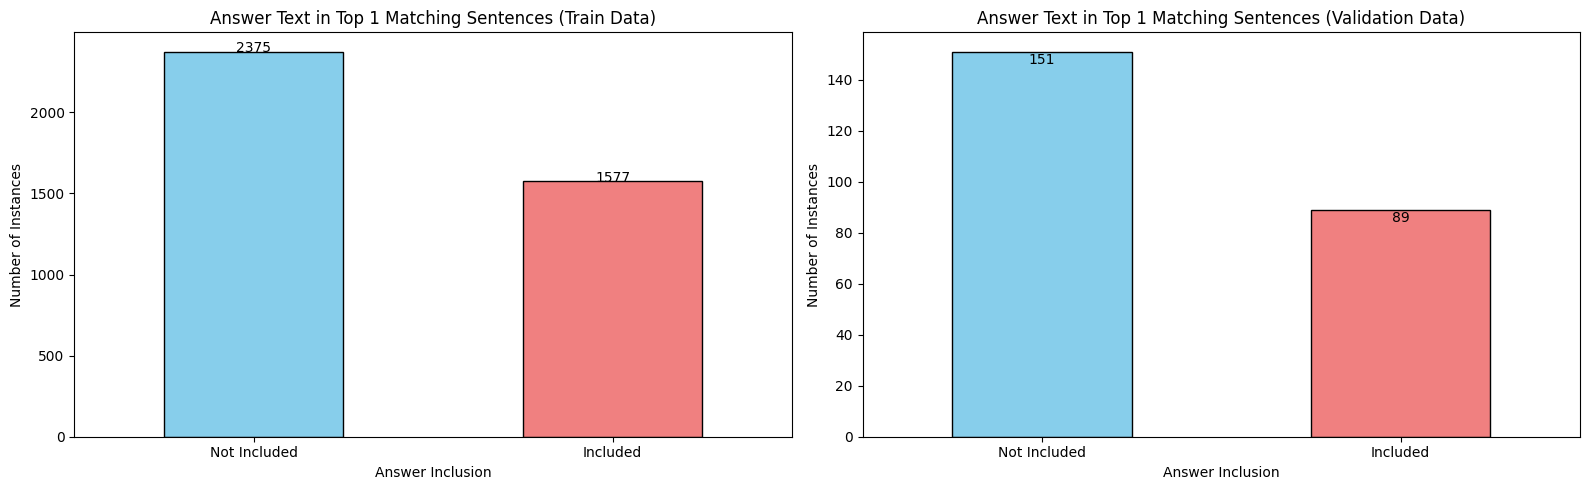

In [81]:
# 두 그래프를 좌우로 동시에 보이게 그리기 (숫자도 함께 표시)
plt.figure(figsize=(16, 5))

# 첫 번째 그래프 (Train Data)
plt.subplot(1, 2, 1)
bars1 = answer_counts.plot(kind='bar', color=['skyblue', 'lightcoral'], edgecolor='black')
plt.title('Answer Text in Top 1 Matching Sentences (Train Data)')
plt.xticks([0, 1], ['Not Included', 'Included'], rotation=0)
plt.xlabel('Answer Inclusion')
plt.ylabel('Number of Instances')

# 첫 번째 그래프 막대 위에 숫자 표시
for bar in bars1.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5, str(int(bar.get_height())), ha='center', color='black')

# 두 번째 그래프 (Validation Data)
plt.subplot(1, 2, 2)
bars2 = answer_counts_val.plot(kind='bar', color=['skyblue', 'lightcoral'], edgecolor='black')
plt.title('Answer Text in Top 1 Matching Sentences (Validation Data)')
plt.xticks([0, 1], ['Not Included', 'Included'], rotation=0)
plt.xlabel('Answer Inclusion')
plt.ylabel('Number of Instances')

# 두 번째 그래프 막대 위에 숫자 표시
for bar in bars2.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5, str(int(bar.get_height())), ha='center', color='black')

# 레이아웃 조정 및 그래프 표시
plt.tight_layout()
plt.show()


- question과 일치하는 토큰 수로 context에서 문장을 뽑아냈을 때 answer가 포함/미포함되는 경우
- Included보다 Not Inclueded가 많다는 것은 paraphrasing이 많이 되고 있다고 의미할 수 있음.
    - 데이터 증강(Data Augmentation)
        - Back-translation: 영어 말고 일본어
        - Paraphrasing을 이용한 데이터 증강

In [82]:
from konlpy.tag import Okt

# Okt 형태소 분석기 사용
okt = Okt()

# 조사를 제거하는 함수
def remove_josa(text):
    tokens = okt.pos(text)
    filtered_tokens = [word for word, pos in tokens if pos != 'Josa']
    return ' '.join(filtered_tokens)


# train_data와 validation_data에 대해 context와 question에서 조사를 제거하는 전처리 수행
train_data['context_no_josa'] = train_data['context'].apply(remove_josa)
train_data['question_no_josa'] = train_data['question'].apply(remove_josa)

validation_data['context_no_josa'] = validation_data['context'].apply(remove_josa)
validation_data['question_no_josa'] = validation_data['question'].apply(remove_josa)

# 조사를 제거한 context와 question을 사용해 top_1_matching_sentences 재생성
train_data['top_1_matching_sentences_no_josa'] = train_data.apply(
    lambda row: get_top_matching_sentences(row['context_no_josa'], row['question_no_josa']), axis=1
)
validation_data['top_1_matching_sentences_no_josa'] = validation_data.apply(
    lambda row: get_top_matching_sentences(row['context_no_josa'], row['question_no_josa']), axis=1
)

# answer text 포함 여부 확인 함수
def check_answer_in_top_sentences_no_josa(row):
    answer_text = row['answers']['text'][0] if 'text' in row['answers'] and row['answers']['text'] else ""
    top_sentences = row['top_1_matching_sentences_no_josa']
    return any(answer_text in sentence for sentence in top_sentences)

# 포함 여부 컬럼 생성
train_data['answer_in_top_sentences_no_josa'] = train_data.apply(check_answer_in_top_sentences, axis=1)
validation_data['answer_in_top_sentences_no_josa'] = validation_data.apply(check_answer_in_top_sentences, axis=1)

# 포함 여부에 따른 개수 계산
answer_counts_no_josa = train_data['answer_in_top_sentences_no_josa'].value_counts()
answer_counts_val_no_josa = validation_data['answer_in_top_sentences_no_josa'].value_counts()


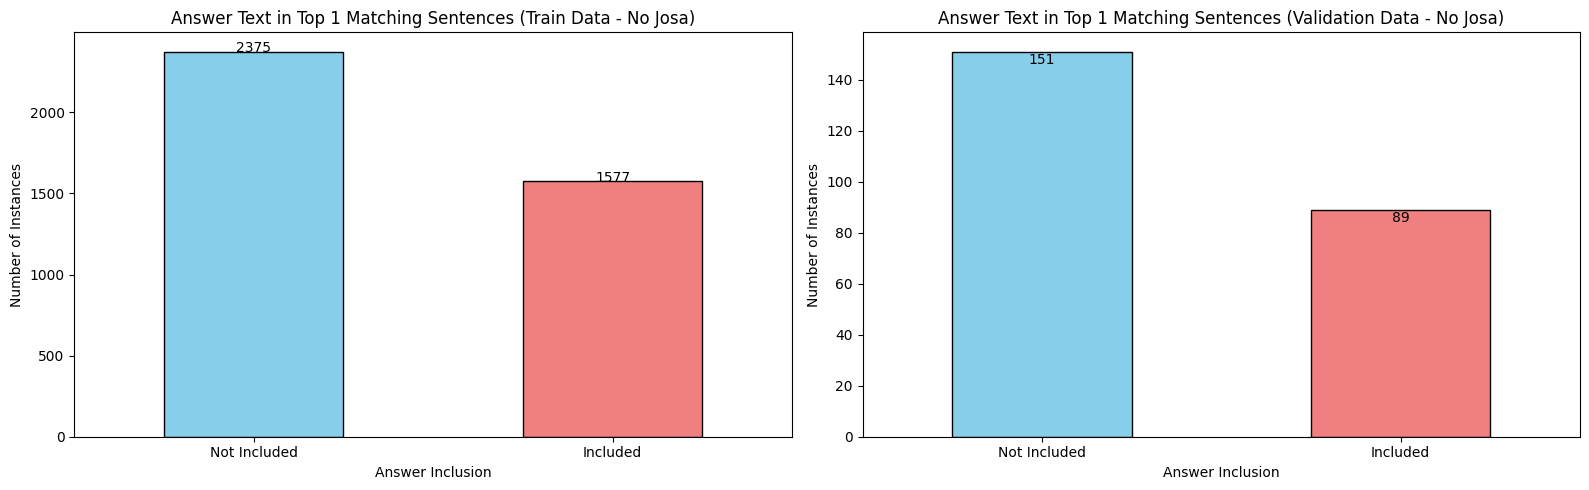

In [83]:

# 두 그래프를 좌우로 동시에 보이게 그리기
plt.figure(figsize=(16, 5))

# 첫 번째 그래프 (Train Data)
plt.subplot(1, 2, 1)
bars1 = answer_counts_no_josa.plot(kind='bar', color=['skyblue', 'lightcoral'], edgecolor='black')
plt.title('Answer Text in Top 1 Matching Sentences (Train Data - No Josa)')
plt.xticks([0, 1], ['Not Included', 'Included'], rotation=0)
plt.xlabel('Answer Inclusion')
plt.ylabel('Number of Instances')
for bar in bars1.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5, str(int(bar.get_height())), ha='center', color='black')

# 두 번째 그래프 (Validation Data)
plt.subplot(1, 2, 2)
bars2 = answer_counts_val_no_josa.plot(kind='bar', color=['skyblue', 'lightcoral'], edgecolor='black')
plt.title('Answer Text in Top 1 Matching Sentences (Validation Data - No Josa)')
plt.xticks([0, 1], ['Not Included', 'Included'], rotation=0)
plt.xlabel('Answer Inclusion')
plt.ylabel('Number of Instances')
for bar in bars2.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5, str(int(bar.get_height())), ha='center', color='black')

# 레이아웃 조정 및 그래프 표시
plt.tight_layout()
plt.show()


In [72]:
display(HTML(f"<div>{train_data.iloc[6].to_frame().to_html()}</div>"))

,6
title,호반
context,"제27회와 제73회에 출현한다. 관우는 자신을 저지하는 공수, 맹탄, 한복, 변희를 살해하면서까지 유비에게로 가려 한다. 형양태수 왕식은 그런 관우를 처치하고자 겉으로는 선심을 베푸는 척하며 관역(館驛)에서 하룻밤을 쉬게 한 후 호반에게는 은밀히 명령하기를, ‘천 명의 병사로 역사를 포위하면서 한 사람 한 사람마다 횃불을 들어 3경(更)이 되면 일제히 방화하여 모조리 불태워 죽이라’고 한다.\n\n명을 실행할 준비를 마치고 기다리는데 문득 ‘관운장의 명성을 들은 지 오래인데 그 모습을 모른다. 한번 엿봐야겠다’는 생각이 떠오른다. 관우는 대청에서 왼손으로 수염을 만지며 등불 아래 책을 보고 있었고, 호반은 자신도 모르게 천인(天人)이라고 소리 내어 감탄한다. 이에 누구냐고 묻는 관우에게 자신을 소개한다. 관우는 이전에 호반의 아버지 호화가 전해달라던 서신을 호반에게 건넨다. 호반은 아버지의 서찰을 읽어보고는 하마터면 충량한 이를 해칠 뻔 했다며 왕식의 계획을 모두 발설하고 자신이 성문을 열어 놓을테니 급히 빠져나가라고 한다. 덕분에 관우와 유비의 두 부인이 탈출한다. 호반은 그 후에야 왕식의 명을 수행해 불을 놓는다.\n\n그 후, 관우가 형주를 장악하고 있을 때 관우에게 귀순한다. 관우는 지난 일을 기억해 호반을 두터이 대한다. 219년(건안 24년), 유비가 한중왕(漢中王)에 오른 후 비시를 관우에게 보내 번성(樊城)을 취하라는 명령을 전한다. 관우는 호반한테 비시를 따라가 유비로부터 벼슬을 받으라 한다. 비시와 함께 촉으로 들어간 후로는 등장하지 않는다."
question,관우를 불태워 죽이려한 사람 누구인가?
id,mrc-0-000532
answers,"{'answer_start': [68], 'text': ['형양태수 왕식']}"
document_id,24395
__index_level_0__,360
answer_start,68
answer_position_ratio,0.088083
token_id_1_count,9
